# AI Working Group
#### 9/14/18

### Goal

* Generate ideas and create AI use cases that can add value
* Learn learn new things and have some fun

### What are we doing in this session?
* A demo of deep learning concepts and how to develop such models in 1h - very ambitious!
* Deep learning is simply neural networks with hidden layers and different configurations
* Predictive analytics is converging to AI, and nowadyas the terms "AI" and "deep learning" are used interchangeably

### Setting expectations

* It's about implementing use cases, actually coding and doing something
* It's not about debating AI/ML definitions, opinions or philosophies
* It's ultimately for those who love to innovate and to code
* The field is in general for practitioners, a lot of steps do not have a "why" theoretically (theory comes after practice)
* For those less familiar with AI or Python, learning curve will be steep but very doable
* There are below more references than one digest in half a year, deep dives are left to you according to your interests

In [1]:
import sys, os
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import random as rn
import math
from math import pi
import tensorflow as tf
import pandas as pd
from numpy import *
import numpy as np
np.random.seed(1212)
import scipy as sc
from IPython.display import display, Image
np.random.seed(9939)
rn.seed(9939)
tf.set_random_seed(9939)

In [2]:
tf.test.gpu_device_name()

'/gpu:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4829691669827660526, name: "/gpu:0"
 device_type: "GPU"
 memory_limit: 384237568
 locality {
   bus_id: 1
 }
 incarnation: 5849925935853155125
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:07.0"]

## Neural Networks

A neural network is composed of units called neurons.

In [4]:
Image(url="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/10/13164412/neuron.png",width=500)

Neurons are defined by their respective "activation functions." A well-known activation function is the sigmoid, which in fact is the inverve function of the logit.

In [5]:
Image(url="http://neuralnetworksanddeeplearning.com/images/tikz29.png",width=300)

\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}
\end{eqnarray}

\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+\exp(-\sum_j w_j x_j-b)}
\end{eqnarray}

In [6]:
Image(url="https://nathanbrixius.files.wordpress.com/2016/06/sigmoid_thumb.png?w=636&h=480",width=400)

There are other types of activation functions, with the most widely use in deep learning being the ReLu function:

\begin{eqnarray} 
  f(x)=\text{max}(0,x)
\end{eqnarray}

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it

In [7]:
Image(url="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/10/17160725/relu-300x300.png",width=300)

For an exposition of activation functions, see below:

https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/

Play with neurons and activations here:

http://neuralnetworksanddeeplearning.com/chap4.html

Neural networks can be formed by combining neurons in certain configurations. A so-called "fully-connected" network is an architecture such that layers of neurons are combined in a serialized manner, with an input layer, an output layer and hidden layers in between.

In [8]:
Image(url="http://neuralnetworksanddeeplearning.com/images/tikz11.png",width=500)

The network we will apply in one of the examples (MNIST handwritten digits) looks like this:

In [9]:
Image(url="http://neuralnetworksanddeeplearning.com/images/tikz12.png",width=600)

In [4]:
784*15+15+15*10+10

11935

## Training Neural Networks

Training a neural network is simply an optimization problem where one aims to find the parameters (weights, biases) that minimize a certain cost function. The most common function adopted for classification problems in deep learning is the cross-entropy:

\begin{eqnarray} 
  C = -\frac{1}{n} \sum_x \left[y \ln \bar{y} + (1-y ) \ln (1-\bar{y}) \right]
\end{eqnarray}

The method that has proven very successful and promoted the explosion of deep learning applications is called Stochastic Gradient Descent (SGD).

#### Stochastic Gradient Descent (SGD)

The optimization problem in deep learning is in fact a minimization problem. We want to find the parameters that give the minimum value of the cost function (cross-entropy). One learns in a basic course in calculus that the gradient (or first derivative) of the function may be used to point in the direction of where the minimum of that function is.

In fact, if we multiply the current value of the parameter by the negative of the gradient times a constant (learning rate), we move one step toward the minimum of the function:

\begin{eqnarray} 
  x = x - \alpha \nabla_x E[J(x)]
\end{eqnarray}

In [11]:
Image(url="https://cdn-images-1.medium.com/max/800/1*HrFZV7pKPcc5dzLaWvngtQ.png",width=500)

Easy enough for a simple convex function.

What if the function looks like this?

In [12]:
Image(url="https://davidmatablog.files.wordpress.com/2017/08/localminima.png",width=500)

And what if the function looks like this?

In [13]:
Image(url="http://www1.lsbu.ac.uk/water/images/dry_surface.gif",width=500)

In [14]:
Image(url="https://cdn-images-1.medium.com/max/600/1*msObu3xbQzSnKvtCW2z6YQ.png",width=500)

A typical approach in deep learning is to iterativelly and randomly (stochastic) select small samples of the input data (mini-batches), compute the gradient of the cost function to each parameter and average it out across the mini-batch, and apply it to move one step in the parameter space. This is done mini-batch by mini-batch until all data points are scanned, which completes one epoch. This is done for many epochs until the "ground state" is achieved.

In [15]:
Image(url="https://cdn-images-1.medium.com/max/800/1*Y2KPVGrVX9MQkeI8Yjy59Q.gif",width=500)

In effect, the cost function in deep learning has no "global minimum" but various local minima around the ground state. A gradient-type of minimization reaches one of these local minima.

In [16]:
Image(url="http://www.skynet.ie/~stephen/reports/images/energy-landscape.gif",width=400)

Here are good references of SGD and SGD-type methods applied in deep learning:

http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/

https://towardsdatascience.com/gradient-descent-algorithms-and-adaptive-learning-rate-adjustment-methods-79c701b086be

https://medium.com/@ramrajchandradevan/the-evolution-of-gradient-descend-optimization-algorithm-4106a6702d39

#### Backpropagation

Backpropagation is one of the most important discoveries (or re-discovery) of modern AI. One thing is designing an algorithm that uses gradients in traning the networks. Another is having an efficient way of even being able to compute these gradients for each of the many paramters in the network. This is what backpropagation achieves. Here is one of the best online resources on backpropagation:

http://colah.github.io/posts/2015-08-Backprop/

Equation

\begin{equation}
e=(a+b)*(b+1)
\end{equation}

may be represented as a graph:

\begin{eqnarray}
c=a+b,\\
d=b+1,\\
e=c∗d.
\end{eqnarray}


In [17]:
Image(url="http://colah.github.io/posts/2015-08-Backprop/img/tree-def.png",width=500)

Say we want the gradient of the cost function 'e' to the parameter 'b'. This is trivial throught the chain rule moving forward from 'b' all the way to 'e' through the graph above:

In [18]:
Image(url="http://colah.github.io/posts/2015-08-Backprop/img/tree-eval-derivs.png",width=500)

However, imagine doing this for all thousands (millions, billions) of parameters in a deep neural network? It's not feasible!

What about if we perform this exercise by going backwards, from 'e' to 'b'? This is what happens:

In [19]:
Image(url="http://colah.github.io/posts/2015-08-Backprop/img/tree-backprop.png",width=500)

In one single pass, we are able to compute the gradient of 'e' to every single node in the graph!

This is already buit-in every deep learning package in use.

## TensorFlow

TensorFlow is the tool of choice for the exercises proposed here. It is the most widely used deep learning package, although there are nowadays many other competing and emerging packages (Caffe, PyTorch, etc).

We are not going through the details of coding with TensorFlow now, but do take a look at these references below. The best way to learn TensorFlow (any programming for that matter) is by doing!

https://www.tensorflow.org/tutorials/

https://arxiv.org/pdf/1610.01178.pdf

https://www.youtube.com/watch?v=MotG3XI2qSs

https://developer.telerik.com/topics/machine-learning/getting-started-tensorflow/

## MNIST

http://yann.lecun.com/exdb/mnist/

MNIST is a go-to dataset for demonstration of deep learning techniques, applications, research, etc.

#### Load MNIST data

In [5]:
# Data was downloaded from: http://yann.lecun.com/exdb/mnist/
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../mnist', one_hot=True)

Extracting ../mnist/train-images-idx3-ubyte.gz
Extracting ../mnist/train-labels-idx1-ubyte.gz
Extracting ../mnist/t10k-images-idx3-ubyte.gz
Extracting ../mnist/t10k-labels-idx1-ubyte.gz


In [6]:
mnist.train.next_batch(4)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [7]:
mnist.validation.next_batch(3)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [8]:
mnist.test.next_batch(3)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]))

In [9]:
img = mnist.train.next_batch(1)[0][0]
img

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

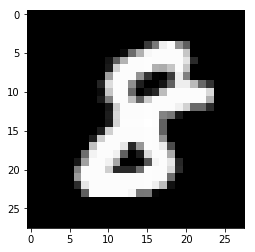

In [10]:
plt.gray()
plt.imshow(np.reshape(img,[28,28]))

In [11]:
# Flatening image
Image(url="https://www.cntk.ai/jup/cntk103a_MNIST_input.png",width=400)

## TensorFlow Fully-Connected Network MNIST

https://dataplatform.ibm.com/analytics/notebooks/91440c8b-0bfb-471e-b04e-235e4d9f510d/view?access_token=fb4380415a903111e26cec3bd95d8ba91a04746185c866fecde9d36643fa5585

#### Hello, Tensor World!
Let’s analyze the Hello World script you ran. For reference, I’ve added the code below.

In [12]:
import tensorflow as tf

# Create TensorFlow object called hello_constant
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


In [13]:
hello_constant

<tf.Tensor 'Const:0' shape=() dtype=string>

#### Tensor

In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of ```hello_constant = tf.constant('Hello World!')```, ```hello_constant``` is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

In [28]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234) 
# B is a 1-dimensional int32 tensor
B = tf.constant([ [123,456,789] ]) 
 # C is a 2-dimensional int32 tensor
C = tf.constant([ [123,456,789], [222,333,444] ])

#### Session

TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process. Let’s take the TensorFlow code you ran and turn that into a graph:
<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580feadb_session/session.png" alt="" class="index--image--1xyr4" style="height: 312.419px; width: 539px;">
A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. Let’s see how you use it.

In [29]:
with tf.Session() as sess:
    output = sess.run(hello_constant)
print(output)

b'Hello World!'


The code has already created the tensor, ```hello_constant```, from the previous lines. The next step is to evaluate the tensor in a session.

The code creates a session instance, sess, using ```tf.Session```,. The ```sess.run()```, function then evaluates the tensor and returns the results.

#### MNIST For ML Beginners

This tutorial is intended for readers who are new to both machine learning and TensorFlow. If you already know what MNIST is, and what softmax (multinomial logistic) regression is, you might prefer this faster paced tutorial. Be sure to install TensorFlow before starting either tutorial.

When one learns how to program, there's a tradition that the first thing you do is print "Hello World." Just like programming has Hello World, machine learning has MNIST.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:
<img style="width:80%" src="https://www.tensorflow.org/images/MNIST.png">

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In this tutorial, we're going to train a model to look at images and predict what digits they are. Our goal isn't to train a really elaborate model that achieves state-of-the-art performance -- although we'll give you code to do that later! -- but rather to dip a toe into using TensorFlow. As such, we're going to start with a very simple model, called a Softmax Regression.

The actual code for this tutorial is very short, and all the interesting stuff happens in just three lines. However, it is very important to understand the ideas behind it: both how TensorFlow works and the core machine learning concepts. Because of this, we are going to very carefully work through the code.

#### About this tutorial

This tutorial is an explanation, line by line, of what is happening in the mnist_softmax.py code.

You can use this tutorial in a few different ways, including:

- Copy and paste each code snippet, line by line, into a Python environment as you read through the explanations of each line.
- Run the entire mnist_softmax.py Python file either before or after reading through the explanations, and use this tutorial to understand the lines of code that aren't clear to you.
What we will accomplish in this tutorial:

- Learn about the MNIST data and softmax regressions
- Create a function that is a model for recognizing digits, based on looking at every pixel in the image
- Use Tensorflow to train the model to recognize digits by having it "look" at thousands of examples (and run our first Tensorflow session to do so)
- Check the model's accuracy with our test data

We describe these interacting operations by manipulating symbolic variables. Let's create one:

In [14]:
Image(url="https://ml4a.github.io/images/figures/mnist_1layer.png",width=600)

In [15]:
x = tf.placeholder(tf.float32, [None, 784])

x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation. We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. (Here None means that a dimension can be of any length.)

We also need the weights and biases for our model. We could imagine treating these like additional inputs, but TensorFlow has an even better way to handle it: Variable. A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. For machine learning applications, one generally has the model parameters be Variables.

In [16]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

We create these Variables by giving tf.Variable the initial value of the Variable: in this case, we initialize both W and b as tensors full of zeros. Since we are going to learn W and b, it doesn't matter very much what they initially are.

Notice that W has a shape of [784, 10] because we want to multiply the 784-dimensional image vectors by it to produce 10-dimensional vectors of evidence for the difference classes. b has a shape of [10] so we can add it to the output.

We can now implement our model. It only takes one line to define it!

In [17]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

#### Training

In order to train our model, we need to define what it means for the model to be good. Well, actually, in machine learning we typically define what it means for a model to be bad. We call this the cost, or the loss, and it represents how far off our model is from our desired outcome. We try to minimize that error, and the smaller the error margin, the better our model is.

To implement cross-entropy we need to first add a new placeholder to input the correct answers:

In [18]:
y_ = tf.placeholder(tf.float32, [None, 10])

Then we can implement the cross-entropy function

In [19]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Now that we know what we want our model to do, it's very easy to have TensorFlow train it to do so. Because TensorFlow knows the entire graph of your computations, it can automatically use the backpropagation algorithm to efficiently determine how your variables affect the loss you ask it to minimize. Then it can apply your choice of optimization algorithm to modify the variables and reduce the loss.

In [20]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In this case, we ask TensorFlow to minimize cross_entropy using the gradient descent algorithm with a learning rate of 0.5. Gradient descent is a simple procedure, where TensorFlow simply shifts each variable a little bit in the direction that reduces the cost. But TensorFlow also provides many other optimization algorithms: using one is as simple as tweaking one line.

What TensorFlow actually does here, behind the scenes, is to add new operations to your graph which implement backpropagation and gradient descent. Then it gives you back a single operation which, when run, does a step of gradient descent training, slightly tweaking your variables to reduce the loss.

In [21]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In order to assess the model performance, we need figure out where we predicted the correct label. tf.argmax is an extremely useful function which gives you the index of the highest entry in a tensor along some axis. For example, tf.argmax(y,1) is the label our model thinks is most likely for each input, while tf.argmax(y_,1) is the correct label. We can use tf.equal to check if our prediction matches the truth.

Let's train the model ...

In [22]:
for i in range(10000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  if i%500 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch_xs,y_:batch_ys})
    test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels})
    print("step %d, training accuracy %g, test accuracy %g"%(i,train_accuracy,test_accuracy))
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print("final test accuracy %g"%test_accuracy)

step 0, training accuracy 0.11, test accuracy 0.098
step 500, training accuracy 0.94, test accuracy 0.9122
step 1000, training accuracy 0.92, test accuracy 0.9193
step 1500, training accuracy 0.91, test accuracy 0.9167
step 2000, training accuracy 0.89, test accuracy 0.9235
step 2500, training accuracy 0.93, test accuracy 0.9207
step 3000, training accuracy 0.9, test accuracy 0.9211
step 3500, training accuracy 0.85, test accuracy 0.923
step 4000, training accuracy 0.91, test accuracy 0.9213
step 4500, training accuracy 0.96, test accuracy 0.9229
step 5000, training accuracy 0.97, test accuracy 0.9225
step 5500, training accuracy 0.98, test accuracy 0.9217
step 6000, training accuracy 0.96, test accuracy 0.9231
step 6500, training accuracy 0.92, test accuracy 0.9248
step 7000, training accuracy 0.92, test accuracy 0.9181
step 7500, training accuracy 0.94, test accuracy 0.9244
step 8000, training accuracy 0.89, test accuracy 0.9242
step 8500, training accuracy 0.95, test accuracy 0.9231

## TensorFlow Multilayer CNN MNIST

In the tutorial above, with a single layer fully-connected network and only 10,000 iterations ran extremely fast and had an accurary of about 92%.

The goal now is to follow the step-by-step guide from TensorFlow's wesite to build a multilayer CNN:

https://www.tensorflow.org/tutorials/estimators/cnn

### *Getting 92% accuracy on MNIST is bad. It's almost embarrassingly bad. In this section, we'll fix that, jumping from a very simple model to something moderately sophisticated: a small convolutional neural network. This will get us to around 99% accuracy -- not state of the art, but respectable.*

#### Convolution and Pooling

TensorFlow also gives us a lot of flexibility in convolution and pooling operations. How do we handle the boundaries? What is our stride size? In this example, we're always going to choose the vanilla version. Our convolutions uses a stride of one and are zero padded so that the output is the same size as the input. Our pooling is plain old max pooling over 2x2 blocks.

In [39]:
Image(url="https://www.cntk.ai/jup/cntk103d_conv2d_final.gif",width=300)

In [40]:
# Convolution
Image(url="https://www.cntk.ai/jup/cntk103d_filterset_v2.png",width=800)

And here is an example of pooling with stride 1.

In [41]:
Image(url="https://www.cntk.ai/jup/cntk103d_same_padding_no_strides.gif",width=300)

In [42]:
Image(url="https://www.katacoda.com/basiafusinska/courses/deep-learning-with-tensorflow/tensorflow-mnist-convolution/assets/convolution.png",width=800)

In [43]:
# Max Pooling
Image(url="https://www.cntk.ai/jup/c103d_max_pooling.gif",width=400)

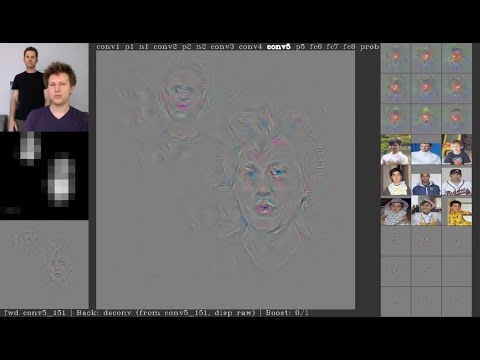

In [44]:
from IPython.display import YouTubeVideo
YouTubeVideo('AgkfIQ4IGaM',width=720,height=400)
# See video fast forward to 1:30min

In [23]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

#### Weight Initialization

To create this model, we're going to need to create a lot of weights and biases. One should generally initialize weights with a small amount of noise for symmetry breaking, and to prevent 0 gradients. Since we're using ReLU neurons, it is also good practice to initialize them with a slightly positive initial bias to avoid "dead neurons". Instead of doing this repeatedly while we build the model, let's create two handy functions to do it for us.

In [24]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#### First Convolutional Layer

We can now implement our first layer. It will consist of convolution, followed by max pooling. The convolution will compute 32 features for each 5x5 patch. Its weight tensor will have a shape of [5, 5, 1, 32]. The first two dimensions are the patch size, the next is the number of input channels, and the last is the number of output channels. We will also have a bias vector with a component for each output channel.

In [25]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

To apply the layer, we first reshape x to a 4d tensor, with the second and third dimensions corresponding to image width and height, and the final dimension corresponding to the number of color channels.

Actually, we'll create the x placeholder directly as we did not run the first tutorial, so there is no x yet.

In [26]:
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1,28,28,1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool. The max_pool_2x2 method will reduce the image size to 14x14.

In [27]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#### Second Convolutional Layer

In order to build a deep network, we stack several layers of this type. The second layer will have 64 features for each 5x5 patch.

In [28]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#### Densely Connected Layer

Now that the image size has been reduced to 7x7, we add a fully-connected layer with 1024 neurons to allow processing on the entire image. We reshape the tensor from the pooling layer into a batch of vectors, multiply by a weight matrix, add a bias, and apply a ReLU.

In [29]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#### Dropout

To reduce overfitting, we will apply dropout before the readout layer. We create a placeholder for the probability that a neuron's output is kept during dropout. This allows us to turn dropout on during training, and turn it off during testing. TensorFlow's tf.nn.dropout op automatically handles scaling neuron outputs in addition to masking them, so dropout just works without any additional scaling.

In [30]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#### Readout Layer

Finally, we add a layer, just like for the one layer softmax regression above.

In [31]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

#### Train and Evaluate the Model

How well does this model do? To train and evaluate it we will use code that is nearly identical to that for the simple one layer SoftMax network above. The differences are that:

* We will replace the steepest gradient descent optimizer with the more sophisticated ADAM optimizer.

* We will include the additional parameter keep_prob in feed_dict to control the dropout rate.

* We will add logging to every 100th iteration in the training process.

Feel free to go ahead and run this code, but it does 20,000 training iterations and may take a while (possibly up to half an hour), depending on your processor.

In [32]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [33]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
prob = 0.8

In [34]:
for i in range(20000):
  batch = mnist.train.next_batch(100)
  if i%500 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0],y_: batch[1],keep_prob:prob})
    test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels,keep_prob:prob})
    print("step %d, train accuracy %g, test accuracy %g"%(i,train_accuracy,test_accuracy))
  train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:prob})
test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels,keep_prob:prob})
print("final test accuracy %g"%test_accuracy)

step 0, train accuracy 0.1, test accuracy 0.0945
step 500, train accuracy 0.95, test accuracy 0.943
step 1000, train accuracy 0.99, test accuracy 0.9656
step 1500, train accuracy 0.95, test accuracy 0.974
step 2000, train accuracy 0.98, test accuracy 0.9785
step 2500, train accuracy 0.97, test accuracy 0.9808
step 3000, train accuracy 0.97, test accuracy 0.9802
step 3500, train accuracy 1, test accuracy 0.984
step 4000, train accuracy 0.98, test accuracy 0.984
step 4500, train accuracy 0.99, test accuracy 0.9862
step 5000, train accuracy 0.99, test accuracy 0.9859
step 5500, train accuracy 0.99, test accuracy 0.9873
step 6000, train accuracy 0.99, test accuracy 0.9886
step 6500, train accuracy 0.98, test accuracy 0.9861
step 7000, train accuracy 1, test accuracy 0.9875
step 7500, train accuracy 1, test accuracy 0.986
step 8000, train accuracy 1, test accuracy 0.9878
step 8500, train accuracy 0.99, test accuracy 0.9883
step 9000, train accuracy 1, test accuracy 0.9881
step 9500, train a

# Other References

#### General

https://medium.com/

#### Python

https://cognitiveclass.ai/courses/python-for-data-science/

#### Deep Learning

http://course.fast.ai/

http://wiki.fast.ai/index.php/Main_Page

http://deeplearning.stanford.edu/tutorial/

https://www.deeplearning.ai/

https://www.kaggle.com/getting-started/37999

# Stay tuned, participate!

Follow posts and communications on:

http://jive.ms.com/groups/mrm-ai

Create an idea for AI use cases on the **"Idea"** button of the Jive website. These ideas will be brought to future sessions of the group and potentially become real projects.